In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: print first 5 entries of the user_sample.json file

import json


with open('/content/drive/MyDrive/major project data/user_sample.json', 'r') as f:
    data = json.load(f)

    # Print the first 5 entries
    for i in range(5):
        print(data[i])


{'created_at': '2020-01-16 02:02:55+00:00', 'description': 'Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw', 'entities': {'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}, 'id': 'u1217628182611927040', 'location': 'Cambridge, MA', 'name': 'Boaz Barak', 'pinned_tweet_id': None, 'profile_image_url': 'https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg', 'protected': False, 'public_metrics': {'followers_count': 7316, 'following_count': 215, 'tweet_count': 3098, 'listed_count': 69}, 'url': 'https://t.co/BoMip9FF17', 'us

In [ ]:
import pandas as pd
labels= pd.read_csv('/content/drive/MyDrive/major project data/label_half.csv', nrows=100)
edge_data_main = pd.read_csv('/content/drive/MyDrive/major project data/edge_sample.csv', nrows=100)


In [ ]:
labels.head()

,id,label
0,u1217628182611927040,human
1,u2664730894,human
2,u1266703520205549568,human
3,u1089159225148882949,human
4,u36741729,bot


In [ ]:
edge_data_main.head()

,source_id,relation,target_id
0,u980749991491682304,followers,u1480979504696864775
1,u105387876,following,u402576793
2,u148520716,following,u59653593
3,u1276438425457967110,following,u1389155636693381120
4,u1445432327367237638,following,u848348952084828160


## **COMBINED DATAFRAME MAKING CODE** :

In [ ]:
import json
import pandas as pd

# Function to process user data and extract features
def process_user_data(user_data):
    features = {
        "id": user_data["id"],
        "name": user_data["name"],
        "username": user_data["username"],
        "created_at": user_data["created_at"],
        "location": user_data["location"],
        "follower_count": user_data["public_metrics"]["followers_count"],
        "following_count": user_data["public_metrics"]["following_count"],
        "tweet_count": user_data["public_metrics"]["tweet_count"],
        "listed_count": user_data["public_metrics"]["listed_count"],
        "verified": user_data["verified"],
        "protected": user_data["protected"]
    }
    return features

# Load JSON data from user.json
with open("/content/drive/MyDrive/major project data/user_sample.json", "r") as f:
    data = json.load(f)

# Convert data to DataFrame and select first 500 rows
user_data_df = pd.DataFrame(data[:5000])

# Apply the process_user_data function to extract features
extracted_features = user_data_df.apply(process_user_data, axis=1)

# Convert extracted features to DataFrame
features_df = pd.DataFrame(list(extracted_features))

# Load label.csv data and select first 500 rows
label_df = pd.read_csv('/content/drive/MyDrive/major project data/label_half.csv', nrows=5000)

# Load edge.csv data and select first 500 rows
edge_df = pd.read_csv('/content/drive/MyDrive/major project data/edge_sample.csv', nrows=5000)

# Combine dataframes
combined_df = pd.merge(features_df, label_df, on='id')
combined_df = pd.merge(combined_df, edge_df, left_on='id', right_on='source_id')

# Display the combined dataframe
# print("Combined Data:")
# print(combined_df.head())


In [ ]:
combined_df.head()

,id,name,username,created_at,location,follower_count,following_count,tweet_count,listed_count,verified,protected,label,source_id,relation,target_id
0,u1519144464,Nikhil Sewdass,NikhilSewdass,2013-06-15 11:34:55+00:00,"Umhlanga, South Africa",161,278,788,0,False,False,human,u1519144464,following,u1854401
1,u1519144464,Nikhil Sewdass,NikhilSewdass,2013-06-15 11:34:55+00:00,"Umhlanga, South Africa",161,278,788,0,False,False,human,u1519144464,following,u905904428565311489
2,u1519144464,Nikhil Sewdass,NikhilSewdass,2013-06-15 11:34:55+00:00,"Umhlanga, South Africa",161,278,788,0,False,False,human,u1519144464,following,u243105488
3,u1341789703633178624,mo,mo39826506,2020-12-23 16:56:30+00:00,None,0,136,6,0,False,False,bot,u1341789703633178624,following,u1081483280225054721
4,u1341789703633178624,mo,mo39826506,2020-12-23 16:56:30+00:00,None,0,136,6,0,False,False,bot,u1341789703633178624,following,u1073326243246944257


In [ ]:
combined_df.shape


(2415, 15)

# **Data Analysis**


Data types of columns:
id                 object
name               object
username           object
created_at         object
location           object
follower_count      int64
following_count     int64
tweet_count         int64
listed_count        int64
verified             bool
protected            bool
label              object
source_id          object
relation           object
target_id          object
dtype: object

Missing values per column:
id                   0
name                 0
username             0
created_at           0
location           541
follower_count       0
following_count      0
tweet_count          0
listed_count         0
verified             0
protected            0
label                0
source_id            0
relation             0
target_id            0
dtype: int64

Summary statistics:
       follower_count  following_count   tweet_count   listed_count
count    2.415000e+03      2415.000000  2.415000e+03    2415.000000
mean     3.752907e+05      25

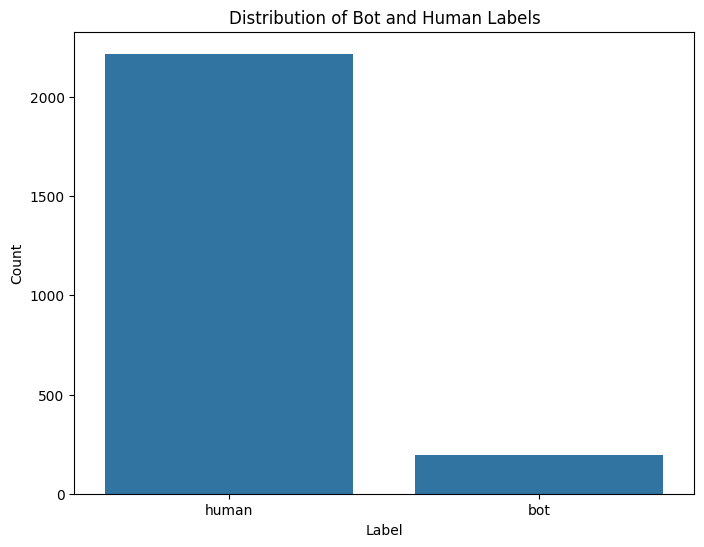

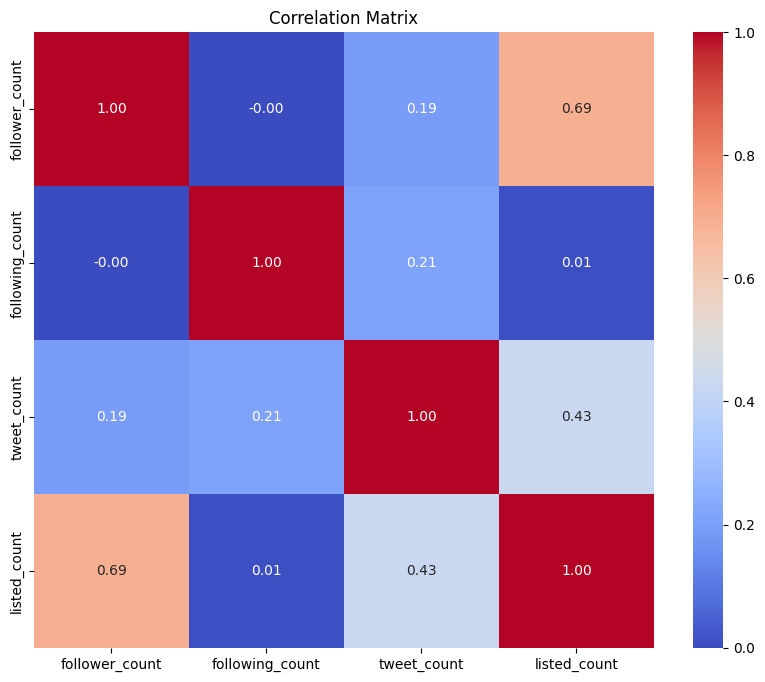

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataframe
temp_combined_df = combined_df
numeric_columns = temp_combined_df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = temp_combined_df[numeric_columns]

# Check the data types of columns
print("\nData types of columns:")
print(temp_combined_df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(temp_combined_df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(temp_combined_df.describe())

# Visualize the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=temp_combined_df)
plt.title('Distribution of Bot and Human Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# prompt: give the code to save the combined_df as  data set

combined_df.to_csv('/content/drive/MyDrive/major project data/combined_data.csv', index=False)


# **Data set Encoding**

In [ ]:
combined_df['label'] = combined_df['label'].replace({'human': 0, 'bot': 1})
combined_df['location_encoded'] = combined_df['location'].apply(lambda x: 1 if pd.notnull(x) else 0)
combined_df.drop('location', axis=1, inplace=True)

In [ ]:
combined_df.head()

,id,name,username,created_at,follower_count,following_count,tweet_count,listed_count,verified,protected,label,source_id,relation,target_id,location_encoded
0,u1519144464,Nikhil Sewdass,NikhilSewdass,2013-06-15 11:34:55+00:00,161,278,788,0,False,False,0,u1519144464,following,u1854401,1
1,u1519144464,Nikhil Sewdass,NikhilSewdass,2013-06-15 11:34:55+00:00,161,278,788,0,False,False,0,u1519144464,following,u905904428565311489,1
2,u1519144464,Nikhil Sewdass,NikhilSewdass,2013-06-15 11:34:55+00:00,161,278,788,0,False,False,0,u1519144464,following,u243105488,1
3,u1341789703633178624,mo,mo39826506,2020-12-23 16:56:30+00:00,0,136,6,0,False,False,1,u1341789703633178624,following,u1081483280225054721,0
4,u1341789703633178624,mo,mo39826506,2020-12-23 16:56:30+00:00,0,136,6,0,False,False,1,u1341789703633178624,following,u1073326243246944257,0


In [ ]:
combined_df.shape


(2415, 15)

# **Graph structure creation**

In [ ]:
import pandas as pd
import networkx as nx



# Initialize a directed graph
graph = nx.DiGraph()

# Add edges to the graph with different relationships
for index, row in combined_df.iterrows():
    source_id = row['source_id']
    target_id = row['target_id']
    relation = row['relation']
    graph.add_edge(source_id, target_id, relation=relation)

# Print basic graph info
#print(nx.info(graph))
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")

# Example: Print the neighbors of a specific node with a specific relation
node_id = 'u29458079'
relation_to_check = 'following'
neighbors_with_relation = [
    neighbor for neighbor, attrs in graph[node_id].items() if 'relation' in attrs and attrs['relation'] == relation_to_check
]
print(f"Neighbors of node {node_id} with relation '{relation_to_check}': {neighbors_with_relation}")

Number of nodes: 3994
Number of edges: 2415
Neighbors of node u29458079 with relation 'following': ['u52136185', 'u249228661', 'u19956026']


In [ ]:
graph.edges

OutEdgeView([('u1519144464', 'u1854401'), ('u1519144464', 'u905904428565311489'), ('u1519144464', 'u243105488'), ('u1341789703633178624', 'u1081483280225054721'), ('u1341789703633178624', 'u1073326243246944257'), ('u138814032', 'u1453406422339883017'), ('u2465283662', 'u1130324320625070080'), ('u2465283662', 'u976620969384185856'), ('u1467973039883182090', 'u1300453414833401858'), ('u1467973039883182090', 'u1094956969'), ('u234059290', 'u58462968'), ('u1142890104853106688', 'u254947051'), ('u1142890104853106688', 'u1146420641765085186'), ('u284870222', 'u3235265588'), ('u284870222', 'u466400667'), ('u765845', 'u760457994'), ('u3212706501', 'u19063323'), ('u2496941382', 'u961605585958588417'), ('u2196860159', 'u3438125063'), ('u2196860159', 'u855651389334319105'), ('u2196860159', 'u979643398570340353'), ('u10129132', 'u3195818664'), ('u1293469199554285568', 'u175292337'), ('u29458079', 'u52136185'), ('u29458079', 'u249228661'), ('u29458079', 'u19956026'), ('u229389391', 'u330136233'), (

# **Edge index dataframe creation**

In [ ]:
import pandas as pd

# Manually create the edge_index DataFrame based on your graph's edges
edges = [
    (source_id, target_id)
    for source_id, target_id in graph.edges()
]

edge_index_df = pd.DataFrame(edges, columns=['source', 'target'])

# Display the first few rows of edge_index_df to verify
print(edge_index_df.head())

                 source                target
0           u1519144464              u1854401
1           u1519144464   u905904428565311489
2           u1519144464            u243105488
3  u1341789703633178624  u1081483280225054721
4  u1341789703633178624  u1073326243246944257


In [ ]:
edge_index_df.shape

(2415, 2)

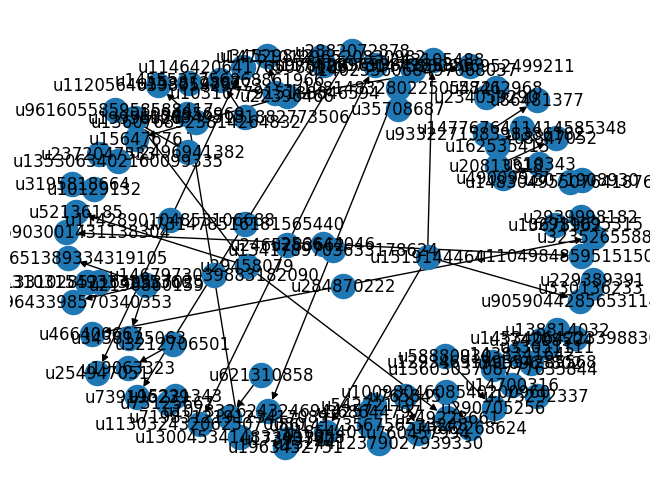

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt



# Get a list of nodes with edges
nodes_with_edges = [node for node in graph.nodes() if graph.degree(node) > 0]

# Take a subset of 200 nodes from the nodes with edges
subgraph_nodes = nodes_with_edges[:100]

# Create a subgraph containing only the selected nodes and their edges
subgraph = graph.subgraph(subgraph_nodes)

# Visualize the subgraph
nx.draw(subgraph, with_labels=True)
plt.show()


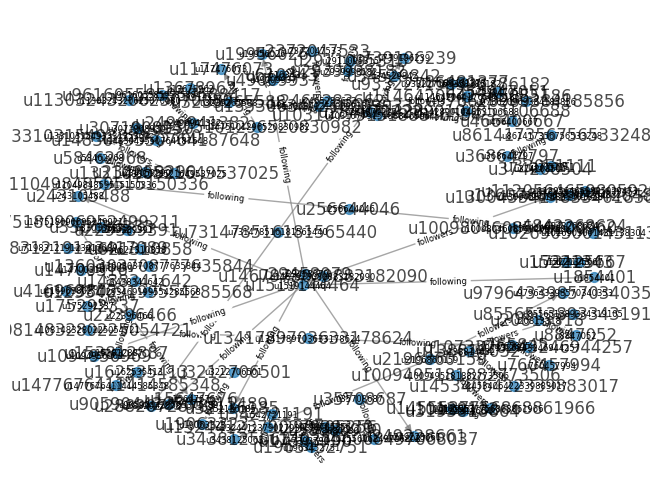

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Get a list of nodes with edges
nodes_with_edges = [node for node in graph.nodes() if graph.degree(node) > 0]

# Take a subset of 200 nodes from the nodes with edges
subgraph_nodes = nodes_with_edges[:100]

# Create a subgraph containing only the selected nodes and their edges
subgraph = graph.subgraph(subgraph_nodes)

# Use spring layout for node positioning
pos = nx.spring_layout(subgraph)

# Draw nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=50, edge_color='gray', alpha=0.7)

# Draw node labels
nx.draw_networkx_labels(subgraph, pos, font_size=6)

# Draw edge labels
nx.draw_networkx_edge_labels(subgraph, pos, font_size=6, edge_labels={(u, v): d['relation'] for u, v, d in subgraph.edges(data=True)})

plt.show()


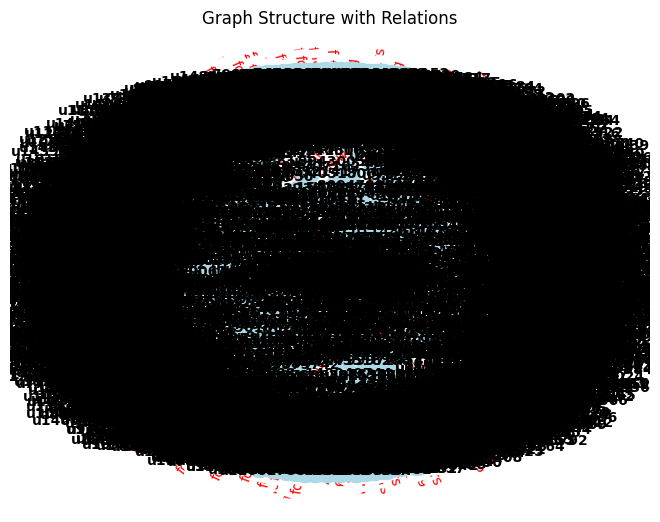

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming you have already created the graph 'graph' using NetworkX

# Create a layout for the nodes
pos = nx.spring_layout(graph)

# Draw the nodes and edges
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, arrows=True)

# Add edge labels with relation information
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')

# Set plot title and display the graph
plt.title("Graph Structure with Relations")
plt.show()

# **Pre Processing**

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.0 MB/s eta 0:00:00


# **pp**

In [ ]:
from sklearn.model_selection import train_test_split
import torch
from torch_geometric.data import Data

# Split data into features (X) and labels (y)
# Split data into features (X) and labels (y)
X = combined_df.drop([ 'id', 'name', 'location_encoded','target_id','source_id','relation','created_at','username'], axis=1)
y = combined_df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['verified'] = X_train['verified'].astype(int)
X_test['verified'] = X_test['verified'].astype(int)
X_train['protected'] = X_train['protected'].astype(int)
X_test['protected'] = X_test['protected'].astype(int)

# Convert X_train and X_test to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)

# Convert y_train and y_test to PyTorch tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create a mapping dictionary for node IDs to indices
node_id_to_index = {node_id: idx for idx, node_id in enumerate(graph.nodes())}

# Update 'source' and 'target' columns in edge_index_df with integer indices
edge_index_df['source'] = edge_index_df['source'].map(node_id_to_index)
edge_index_df['target'] = edge_index_df['target'].map(node_id_to_index)

edge_index_tensor = torch.tensor(edge_index_df.values, dtype=torch.long).t().contiguous()

# Split edge_index_tensor into training and test edge indices
train_edge_index = edge_index_tensor[:, edge_index_tensor[1] < len(X_train_tensor)]
test_edge_index = edge_index_tensor[:, edge_index_tensor[1] >= len(X_train_tensor)]

# Create a PyTorch Geometric Data object for training
train_data = Data(x=X_train_tensor, edge_index=train_edge_index, y=y_train_tensor)

# Create a PyTorch Geometric Data object for testing
test_data = Data(x=X_test_tensor, edge_index=test_edge_index, y=y_test_tensor)

# Display the first few rows of the training and test data objects to verify
print("Training Data:")
print(train_data)
print("\nTest Data:")
print(test_data)

Training Data:
Data(x=[1932, 7], edge_index=[2, 2415], y=[1932])

Test Data:
Data(x=[483, 7], edge_index=[2, 0], y=[483])


# **GCN Model training**

# **Correct code**

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1, Loss: 110270.4531, Accuracy: 0.3675
Epoch 2, Loss: 58903.1289, Accuracy: 0.5528
Epoch 3, Loss: 30803.2812, Accuracy: 0.7407
Epoch 4, Loss: 10596.8916, Accuracy: 0.8442
Epoch 5, Loss: 6988.6914, Accuracy: 0.8944
Epoch 6, Loss: 637.1398, Accuracy: 0.9073
Epoch 7, Loss: 558.2177, Accuracy: 0.9115
Epoch 8, Loss: 674.1017, Accuracy: 0.9177
Epoch 9, Loss: 511.7157, Accuracy: 0.9172
Epoch 10, Loss: 631.1129, Accuracy: 0.9198
Epoch 11, Loss: 639.2135, Accuracy: 0.9187
Epoch 12, Loss: 552.5966, Accuracy: 0.9182
Epoch 13, Loss: 684.3340, Accuracy: 0.9161
Epoch 14, Loss: 747.1538, Accuracy: 0.9172
Epoch 15, Loss: 737.9798, Accuracy: 0.9187
Epoch 16, Loss: 884.7448, Accuracy: 0.9193
Epoch 17, Loss: 761.2819, Accuracy: 0.9182
Epoch 18, Loss: 776.5642, Accuracy: 0.9187
Epoch 19, Loss: 670.1569, Accuracy: 0.9198
Epoch 20, Loss: 725.2594, Accuracy: 0.9172
Epoch 21, Loss: 912.3316, Accuracy: 0.9167
Epoch 22, Loss: 863.1865, Accuracy: 0.9177
Epoch 23, Loss: 1083.7256, Accuracy: 0.9146
Epoch 24,

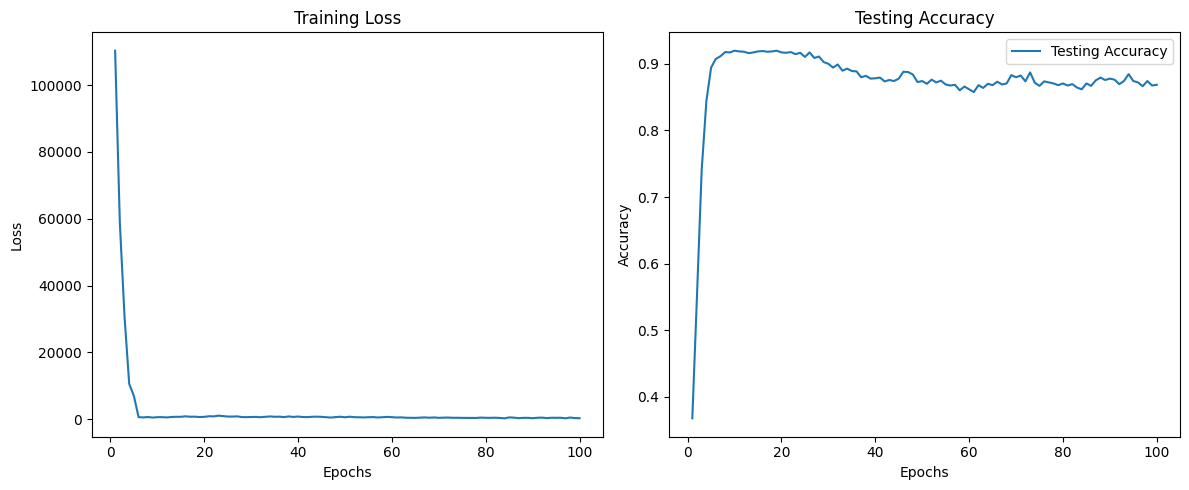

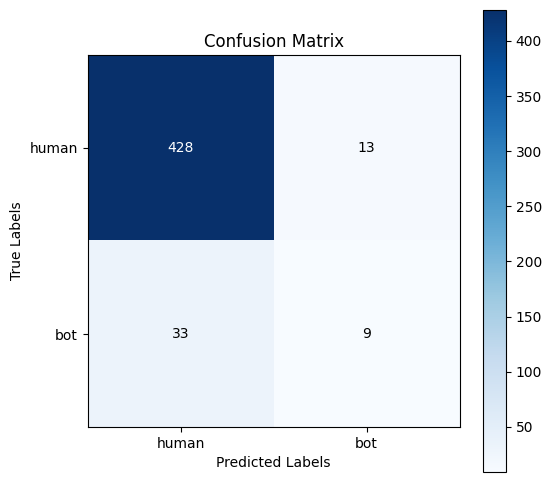

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the GCN model class
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Assuming X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, and train_loader are defined
input_dim = X_train_tensor.size(1)
hidden_dim = 64
output_dim = 2
model = GCN(input_dim, hidden_dim, output_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Lists to store loss and accuracy for plotting
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []


train_loader = DataLoader([train_data], batch_size=32)

# Train the GCN model
model.train()
for epoch in range(100):
    total_loss = 0
    correct = 0
    total = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(out, 1)
        correct += (predicted == batch.y).sum().item()
        total += batch.y.size(0)

    train_loss = total_loss / len(train_loader.dataset)
    train_acc = correct / total

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}')

# Evaluate on test data
model.eval()
with torch.no_grad():
    test_out = model(X_test_tensor, test_edge_index)  # Assuming you have test_edge_index defined
    test_pred = test_out.argmax(dim=1)
    test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    test_accuracies.append(test_accuracy)
    test_precision = precision_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    test_recall = recall_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    test_f1 = f1_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy')

plt.legend()
plt.tight_layout()
plt.show()

# Plotting Confusion Matrix
cm = confusion_matrix(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['human', 'bot'])
plt.yticks([0, 1], ['human', 'bot'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Extract the number of correct predictions
correct_predictions = cm[0][0] + cm[1][1]

# Calculate the total number of predictions
total_predictions = len(y_test)

# Print the results
print(f"Correct predictions: {correct_predictions}")
print(f"Total predictions: {total_predictions}")
print("Confusion Matrix:")
print(cm)


Correct predictions: 439
Total predictions: 483
Confusion Matrix:
[[  6  36]
 [  8 433]]


In [ ]:
# prompt: give the code to validate the accuracy

from sklearn.metrics import accuracy_score

# Calculate the accuracy using sklearn's accuracy_score function
accuracy = accuracy_score(y_test, test_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8944


In [ ]:
# prompt: give the code to get the number of correctly predicted outcomes and also total number of outcomes

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Extract the number of correct predictions
correct_predictions = cm[0][0] + cm[1][1]

# Calculate the total number of predictions
total_predictions = len(y_test)

# Print the results
print(f"Correct predictions: {correct_predictions}")
print(f"Total predictions: {total_predictions}")
print("Confusion Matrix:")
print(cm)


Correct predictions: 432
Total predictions: 483


In [ ]:
cm

array([[  9,  33],
       [ 18, 423]])

In [ ]:
#cut codes

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
from torch_geometric.utils import to_dense_batch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)  # Dropout for regularization
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the GCN model
input_dim = X_train_tensor.size(1)  # Number of input features
hidden_dim = 64  # Hidden layer dimension
output_dim = 2  # Number of classes (0 and 1)
model = GCN(input_dim, hidden_dim, output_dim)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Create a DataLoader for batching the data during training
batch_size = 32
train_loader = DataLoader([train_data], batch_size=batch_size)

# Train the GCN model
model.train()
for epoch in range(100):  # Number of training epochs
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

# Evaluate the trained model on the test data
model.eval()
with torch.no_grad():
    test_out = model(X_test_tensor, train_edge_index)
    test_pred = test_out.argmax(dim=1)
    test_accuracy = (test_pred == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Test Accuracy: {test_accuracy:.4f}')

    test_precision = precision_score(y_test_tensor.tolist(), test_pred.tolist())
    test_recall = recall_score(y_test_tensor.tolist(), test_pred.tolist())
    test_f1 = f1_score(y_test_tensor.tolist(), test_pred.tolist())
    test_cm = confusion_matrix(y_test_tensor.tolist(), test_pred.tolist())
    print('Evaluation on Test Data:')
    print(f'Test Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}')
    print('Confusion Matrix:')
    print(test_cm)


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1, Loss: 175179.5156
Epoch 2, Loss: 88874.3125
Epoch 3, Loss: 74131.2656
Epoch 4, Loss: 13338.3701
Epoch 5, Loss: 5652.7622
Epoch 6, Loss: 14998.1914
Epoch 7, Loss: 1387.9777
Epoch 8, Loss: 455.2764
Epoch 9, Loss: 479.5121
Epoch 10, Loss: 432.4127
Epoch 11, Loss: 520.2191
Epoch 12, Loss: 482.4072
Epoch 13, Loss: 376.7616
Epoch 14, Loss: 388.7162
Epoch 15, Loss: 483.0125
Epoch 16, Loss: 539.7403
Epoch 17, Loss: 440.6250
Epoch 18, Loss: 457.8869
Epoch 19, Loss: 448.2403
Epoch 20, Loss: 569.5392
Epoch 21, Loss: 655.4438
Epoch 22, Loss: 522.3199
Epoch 23, Loss: 554.1653
Epoch 24, Loss: 588.0306
Epoch 25, Loss: 608.8064
Epoch 26, Loss: 437.6509
Epoch 27, Loss: 472.5695
Epoch 28, Loss: 505.5266
Epoch 29, Loss: 584.8197
Epoch 30, Loss: 464.4878
Epoch 31, Loss: 447.1774
Epoch 32, Loss: 475.2291
Epoch 33, Loss: 367.6837
Epoch 34, Loss: 486.6770
Epoch 35, Loss: 475.7358
Epoch 36, Loss: 417.2170
Epoch 37, Loss: 393.0748
Epoch 38, Loss: 426.8065
Epoch 39, Loss: 339.8498
Epoch 40, Loss: 494.9

Epoch 1, Loss: 15486.8730, Accuracy: 0.5885
Epoch 2, Loss: 1550.4720, Accuracy: 0.7981
Epoch 3, Loss: 282.6596, Accuracy: 0.8820
Epoch 4, Loss: 659.5692, Accuracy: 0.9079
Epoch 5, Loss: 460.3570, Accuracy: 0.9146
Epoch 6, Loss: 362.7314, Accuracy: 0.9182
Epoch 7, Loss: 362.5495, Accuracy: 0.9182
Epoch 8, Loss: 555.2271, Accuracy: 0.9193
Epoch 9, Loss: 423.0059, Accuracy: 0.9182
Epoch 10, Loss: 447.5586, Accuracy: 0.9187
Epoch 11, Loss: 578.1964, Accuracy: 0.9193
Epoch 12, Loss: 537.4173, Accuracy: 0.9203
Epoch 13, Loss: 588.1479, Accuracy: 0.9177
Epoch 14, Loss: 494.5037, Accuracy: 0.9151
Epoch 15, Loss: 554.1436, Accuracy: 0.9141
Epoch 16, Loss: 516.8751, Accuracy: 0.9156
Epoch 17, Loss: 368.2253, Accuracy: 0.9042
Epoch 18, Loss: 491.6797, Accuracy: 0.9058
Epoch 19, Loss: 457.8805, Accuracy: 0.9001
Epoch 20, Loss: 459.9579, Accuracy: 0.8986
Epoch 21, Loss: 573.4150, Accuracy: 0.8789
Epoch 22, Loss: 468.0792, Accuracy: 0.8835
Epoch 23, Loss: 509.6562, Accuracy: 0.8722
Epoch 24, Loss: 4

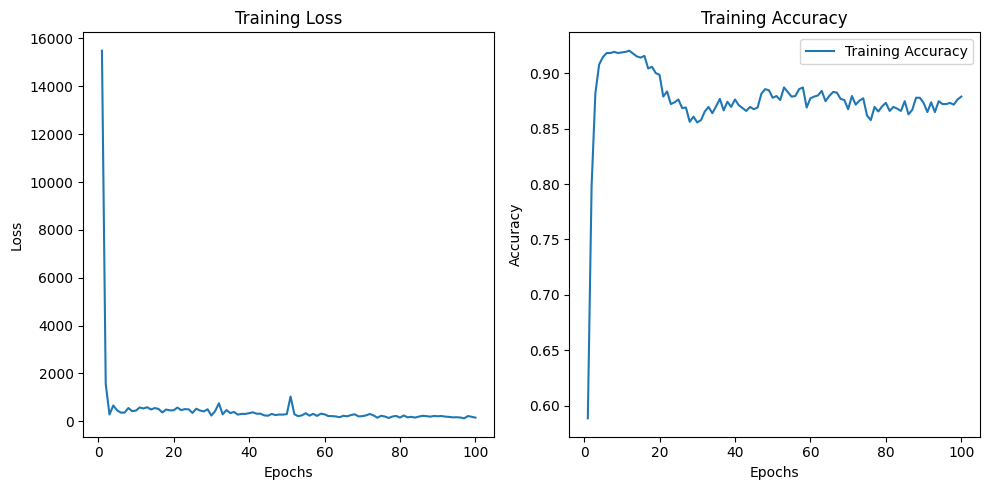

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the GCN model class
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Assuming X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, and train_loader are defined
input_dim = X_train_tensor.size(1)
hidden_dim = 64
output_dim = 2
model = GCN(input_dim, hidden_dim, output_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Lists to store loss and accuracy for plotting
train_losses = []
train_accuracies = []

# Train the GCN model
model.train()
for epoch in range(100):
    total_loss = 0
    correct = 0
    total = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(out, 1)
        correct += (predicted == batch.y).sum().item()
        total += batch.y.size(0)

    train_loss = total_loss / len(train_loader.dataset)
    train_acc = correct / total

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}')

# Calculate evaluation metrics on test data
model.eval()
with torch.no_grad():
    test_out = model(X_test_tensor, test_edge_index)  # Assuming you have test_edge_index defined
    test_pred = test_out.argmax(dim=1)
    test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    test_precision = precision_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    test_recall = recall_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    test_f1 = f1_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')

# Plotting loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.legend()
plt.tight_layout()
plt.show()


# **3 layer gcn**

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
from torch_geometric.utils import to_dense_batch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the GCN model with three layers
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim1)
        self.conv2 = GCNConv(hidden_dim1, hidden_dim2)
        self.conv3 = GCNConv(hidden_dim2, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the GCN model with three layers
input_dim = X_train_tensor.size(1)  # Number of input features
hidden_dim1 = 64  # Hidden layer 1 dimension
hidden_dim2 = 32  # Hidden layer 2 dimension
output_dim = 2  # Number of classes (0 and 1)
model = GCN(input_dim, hidden_dim1, hidden_dim2, output_dim)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Create a DataLoader for batching the data during training
batch_size = 32
train_loader = DataLoader([train_data], batch_size=batch_size)

# Train the GCN model
model.train()
for epoch in range(100):  # Number of training epochs
    total_loss = 0
    all_preds = []
    all_labels = []
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Collect predictions and labels for metrics calculation
        preds = out.argmax(dim=1)
        all_preds.extend(preds.tolist())
        all_labels.extend(batch.y.tolist())

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    # cm = confusion_matrix(all_labels, all_preds)

    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')
    # print('Confusion Matrix:')
    # print(cm)

# Evaluate the trained model on the test data
model.eval()
with torch.no_grad():
    test_out = model(X_test_tensor, train_edge_index)
    test_pred = test_out.argmax(dim=1)
    test_accuracy = accuracy_score(y_test_tensor.tolist(), test_pred.tolist())
    test_precision = precision_score(y_test_tensor.tolist(), test_pred.tolist())
    test_recall = recall_score(y_test_tensor.tolist(), test_pred.tolist())
    test_f1 = f1_score(y_test_tensor.tolist(), test_pred.tolist())
    test_cm = confusion_matrix(y_test_tensor.tolist(), test_pred.tolist())
    print('Evaluation on Test Data:')
    print(f'Test Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}')
    print('Confusion Matrix:')
    print(test_cm)


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1, Loss: 156956.5156, Accuracy: 0.1718, Precision: 0.9317, Recall: 0.1075, F1-score: 0.1927
Epoch 2, Loss: 42776.4609, Accuracy: 0.3861, Precision: 0.9240, Recall: 0.3624, F1-score: 0.5206
Epoch 3, Loss: 20688.3340, Accuracy: 0.6734, Precision: 0.9152, Recall: 0.7107, F1-score: 0.8001
Epoch 4, Loss: 5204.6274, Accuracy: 0.8235, Precision: 0.9194, Recall: 0.8858, F1-score: 0.9023
Epoch 5, Loss: 800.2890, Accuracy: 0.8954, Precision: 0.9213, Recall: 0.9690, F1-score: 0.9446
Epoch 6, Loss: 452.8385, Accuracy: 0.9037, Precision: 0.9189, Recall: 0.9820, F1-score: 0.9494
Epoch 7, Loss: 431.6282, Accuracy: 0.9141, Precision: 0.9193, Recall: 0.9938, F1-score: 0.9551
Epoch 8, Loss: 645.2108, Accuracy: 0.9177, Precision: 0.9200, Recall: 0.9972, F1-score: 0.9571
Epoch 9, Loss: 605.2838, Accuracy: 0.9187, Precision: 0.9201, Recall: 0.9983, F1-score: 0.9576
Epoch 10, Loss: 638.7307, Accuracy: 0.9182, Precision: 0.9196, Recall: 0.9983, F1-score: 0.9574
Epoch 11, Loss: 658.0499, Accuracy: 0.919

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm1 = confusion_matrix(y_test, test_pred)

In [ ]:
cm1

array([[  0,  42],
       [  0, 441]])

# **Graph structure visualization**

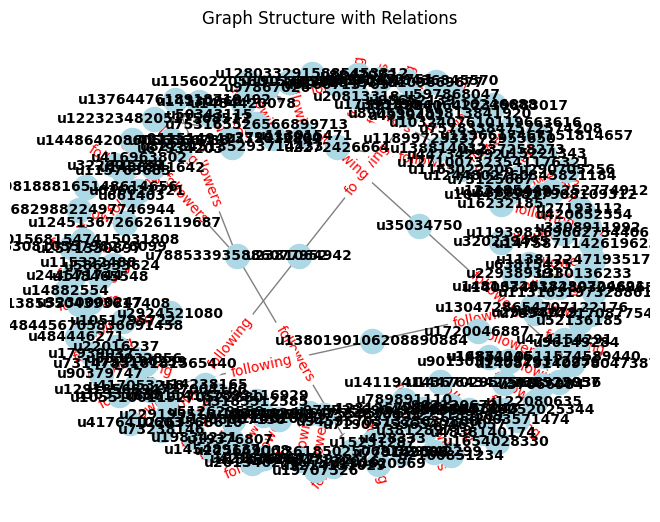

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming you have already created the graph 'graph' using NetworkX

# Create a layout for the nodes
pos = nx.spring_layout(graph)

# Draw the nodes and edges
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold', arrows=True)

# Add edge labels with relation information
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')

# Set plot title and display the graph
plt.title("Graph Structure with Relations")
plt.show()


In [ ]:
# prompt: give the code to install tweepy library

!pip install tweepy


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

104.154.194.244


In [ ]:
import tweepy
import streamlit as st
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.data import Data

# Authenticate with Twitter API
consumer_key = "IlWgLdXXBw8ZsMpNPj9V6D5R8"
consumer_secret = "AvNl6VoW1Pe48N1OhRRiov8IDEPVM7euMNpgkHR4WgJsKtGOpP"
access_token = "1782303053657595904-NhNNxI4cOxi3GeKmaPt2aRSRw6I6UV"
access_token_secret = "J0bYyuWmtGtiLQq1ewq18jRTZTEEXUD0ltjf4d6STVS5K"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'gcn_model.pth')


In [ ]:
def extract_twitter_features(username):
    try:
        user = api.get_user(username)
        features = {
            'id': user.id,
            'name': user.name,
            'username': user.screen_name,
            'created_at': user.created_at,
            'location': user.location,
            'follower_count': user.followers_count,
            'following_count': user.friends_count,
            'tweet_count': user.statuses_count,
            'listed_count': user.listed_count,
            'verified': user.verified,
            'protected': user.protected
        }
        return features
    except tweepy.TweepError as e:
        return {'error': str(e)}


In [ ]:
# Load the saved GCN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model_path = "/content/gcn_model.pth"
model = torch.load(model_path)
# model.eval()


In [ ]:
%%writefile app.py
import streamlit as st
import tweepy
# Streamlit App
st.title("Twitter Bot Detection")

# Input username from the user
username = st.text_input("Enter Twitter Username:")

if st.button("Get Features"):
    if username:
            user = tweepy.api.get_user(username)
            features = {
                'id': user.id,
                'name': user.name,
                'username': user.screen_name,
                'created_at': user.created_at,
                'location': user.location,
                'follower_count': user.followers_count,
                'following_count': user.friends_count,
                'tweet_count': user.statuses_count,
                'listed_count': user.listed_count,
                'verified': user.verified,
                'protected': user.protected
            }
            st.write("### Extracted Features:")
            for key, value in features.items():
                st.write(f"- {key}: {value}")

            # Bot Detection Prediction
            with torch.no_grad():
                x_tensor = torch.tensor([list(features.values())[2:]], dtype=torch.float)
                edge_index_tensor = torch.tensor([[0, 1], [1, 0]], dtype=torch.long)  # Dummy edge index for single node
                pred = model(x_tensor, edge_index_tensor).argmax(dim=1).item()

                if pred == 1:
                    st.warning("This account is predicted to be a bot.")
                else:
                    st.success("This account is predicted to be human.")
        # except tweepy.TweepError as e:
        #     st.error(f"Error: {e}")
    else:
        st.warning("Please enter a Twitter username.")


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.154.194.244:8501

npx: installed 22 in 2.074s
your url is: https://sad-women-dance.loca.lt
2024-05-05 12:52:47.650 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 600, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 11, in <module>
    user = tweepy.api.get_user(username)
  File "/usr/local/lib/python3.10/dist-packages/tweepy/api.py", line 46, in wrapper
    return method(*args, **kwargs)
TypeError: API.get_user() takes 1 positional argument but 2 were given
  Stopping...
^C


In [ ]:
%%writefile app1.py

import tweepy
import streamlit as st
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.data import Data


consumer_key = "IlWgLdXXBw8ZsMpNPj9V6D5R8"
consumer_secret = "AvNl6VoW1Pe48N1OhRRiov8IDEPVM7euMNpgkHR4WgJsKtGOpP"
access_token = "1782303053657595904-NhNNxI4cOxi3GeKmaPt2aRSRw6I6UV"
access_token_secret = "J0bYyuWmtGtiLQq1ewq18jRTZTEEXUD0ltjf4d6STVS5K"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
def extract_twitter_features(username):
    # try:
        api = tweepy.API(auth)
        user = api.get_user(username)
        # Extract relevant features from the user object
        id = user.id_str
        name = user.name
        username = user.screen_name
        created_at = user.created_at
        location = user.location
        followers_count = user.followers_count
        following_count = user.friends_count
        tweet_count = user.statuses_count
        verified = user.verified
        protected = user.protected

        # Return the extracted features
        return id, name, username, created_at, location, followers_count, following_count, tweet_count, verified, protected
    # except tweepy.TweepError as e:
    #     st.error(f"Error fetching user data: {e}")
    #     return None
def predict_bot_or_human(features):
    # Load your saved model (replace 'your_model_path' with the actual path)
    model = torch.load('/content/gcn_model.pth')
    # model.eval()

    # Prepare the features for prediction (you may need to preprocess them)
    features_tensor = torch.tensor(features, dtype=torch.float).unsqueeze(0)

    # Make predictions using the model
    with torch.no_grad():
        output = model(features_tensor)

    # Process the output and return the prediction
    # (example: return 'Bot' if output.item() == 1 else 'Human')
    return output.item()
if __name__ == '__main__':
    st.title('Twitter Bot Detection')

    username = st.text_input('Enter Twitter Username:')
    if st.button('Extract Features and Predict'):
        features = extract_twitter_features(username)
        if features is not None:
            st.write("Extracted Features:")
            st.write(features)

            prediction = predict_bot_or_human(features)
            st.write(f"Predicted Class: {prediction}")


Writing app1.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.154.194.244:8501

npx: installed 22 in 2.863s
your url is: https://empty-brooms-tell.loca.lt
2024-05-05 13:02:46.956 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 600, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 11, in <module>
    user = tweepy.api.get_user(username)
  File "/usr/local/lib/python3.10/dist-packages/tweepy/api.py", line 46, in wrapper
    return method(*args, **kwargs)
TypeError: API.get_user() takes 1 positional argument but 2 were given
  Stopping...
^C


In [ ]:
import tweepy

# Authenticate to Twitter
consumer_key = "3LScnlt0w5ahcC7XQ39kz6EW2"
consumer_secret = "5fvnvDrqrByEl3OnIjta9i3zeuT9xRw4m0kxCCtiCcNb81w8UY"
access_token = "1299623343549685760-REd168WZqbdFjcYGVw2eL2tjnrcSAQ"
access_token_secret = "B1GHqbrgDpJjwrdXAuSBZJy3iHtPnn0zux8j5EriykANo"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Initialize Tweepy API
api = tweepy.API(auth)

# Get user information
# try:
username = "anotherr_avenger"  # Replace with the username you want to query
user = api.get_user(screen_name=username)

# Extract relevant features
user_id = user.id
name = user.name
screen_name = user.screen_name
created_at = user.created_at
location = user.location
followers_count = user.followers_count
friends_count = user.friends_count
statuses_count = user.statuses_count
listed_count = user.listed_count
verified = user.verified
protected = user.protected

    # Print or use these features as needed
print("User ID:", user_id)
print("Name:", name)
print("Username:", screen_name)
print("Created At:", created_at)
print("Location:", location)
print("Followers Count:", followers_count)
print("Friends Count:", friends_count)
print("Statuses Count:", statuses_count)
print("Listed Count:", listed_count)
print("Verified:", verified)
print("Protected:", protected)

# except tweepy.TweepError as e:
#     print("Error:", str(e))


Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product